In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('train_full.csv',index_col=[0])

In [3]:
train.shape

(1458, 173)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Columns: 173 entries, MSSubClass to GarageType_Detchd
dtypes: float64(11), int64(162)
memory usage: 1.9 MB


In [5]:
train.SalePrice.describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,...,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
0,10,65.0,8450,3,3,0,0,5,7,5,...,0,0,0,0,0,1,0,0,0,0
1,5,80.0,9600,3,3,0,0,2,6,8,...,0,0,0,0,0,1,0,0,0,0
2,10,68.0,11250,0,3,0,0,5,7,5,...,0,0,0,0,0,1,0,0,0,0
3,11,60.0,9550,0,3,0,0,5,7,5,...,0,0,0,0,0,0,0,0,0,1
4,10,84.0,14260,0,3,0,0,5,8,5,...,0,0,0,0,0,1,0,0,0,0


In [7]:
def root_mean_squared_log_error(y_valid, y_preds):
    """Calculate root mean squared error of log(y_true) and log(y_pred)"""
    if len(y_preds)!=len(y_valid): return 'error_mismatch'
    y_preds_new = [math.log(x) for x in y_preds]
    y_valid_new = [math.log(x) for x in y_valid]
    return mean_squared_error(y_valid_new, y_preds_new, squared=False)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
y=train['SalePrice']
x=train.drop(['SalePrice'],axis=1)

In [10]:
X_train, X_valid, y_train, y_valid=train_test_split(x,y,random_state=73)

In [11]:
dtr=DecisionTreeRegressor(random_state=73)

In [12]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=73)

In [13]:
y_pred=dtr.predict(X_valid)

In [14]:
print('RMSLE:', root_mean_squared_log_error(y_valid, y_pred))

RMSLE: 0.20290697717020503


In [15]:
RF=RandomForestRegressor(n_estimators=1000,random_state=73)
RF.fit(X_train,y_train)
y_pred_RF=RF.predict(X_valid)
print('RMSLE:', root_mean_squared_log_error(y_valid, y_pred_RF))

RMSLE: 0.14183292932768074


In [16]:
XGB=XGBRegressor(n_estimators=1200,learning_rate=0.05,random_state=73)
XGB.fit(X_train,y_train)
y_pred_XGB=XGB.predict(X_valid)
print('RMSLE:', root_mean_squared_log_error(y_valid, y_pred_XGB))

RMSLE: 0.12839485850503557


In [17]:
'''params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

grid = GridSearchCV(XGB, param_grid=params, n_jobs=4, cv=5, verbose=3 )
grid.fit(X_train,y_train)
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)'''

"params = {\n        'min_child_weight': [1, 5, 10],\n        'gamma': [0.5, 1, 1.5, 2, 5],\n        'subsample': [0.6, 0.8, 1.0],\n        'colsample_bytree': [0.6, 0.8, 1.0],\n        'max_depth': [3, 4, 5]\n        }\n\ngrid = GridSearchCV(XGB, param_grid=params, n_jobs=4, cv=5, verbose=3 )\ngrid.fit(X_train,y_train)\nprint('\n All results:')\nprint(grid.cv_results_)\nprint('\n Best estimator:')\nprint(grid.best_estimator_)\nprint('\n Best score:')\nprint(grid.best_score_ * 2 - 1)\nprint('\n Best parameters:')\nprint(grid.best_params_)"

In [18]:
hp_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1200, n_jobs=0, num_parallel_tree=1, random_state=73,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
hp_model.fit(X_train,y_train)
y_pred_hp_model=hp_model.predict(X_valid)
print('RMSLE:', root_mean_squared_log_error(y_valid, y_pred_hp_model))

RMSLE: 0.12196873766102913


In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid, y_pred_hp_model)

15427.72839255137

In [21]:
import eli5
from eli5.sklearn import PermutationImportance
perm=PermutationImportance(hp_model, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

D:\Users\CHOWKELVIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
D:\Users\CHOWKELVIN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1445 ± 0.0053,OverallQual
0.1029 ± 0.0082,GrLivArea
0.0268 ± 0.0013,TotalBsmtSF
0.0202 ± 0.0021,GarageCars
0.0201 ± 0.0022,BsmtFinSF1
0.0130 ± 0.0011,LotArea
0.0104 ± 0.0009,Age
0.0085 ± 0.0009,1stFlrSF
0.0083 ± 0.0006,OverallCond
0.0071 ± 0.0007,Renew


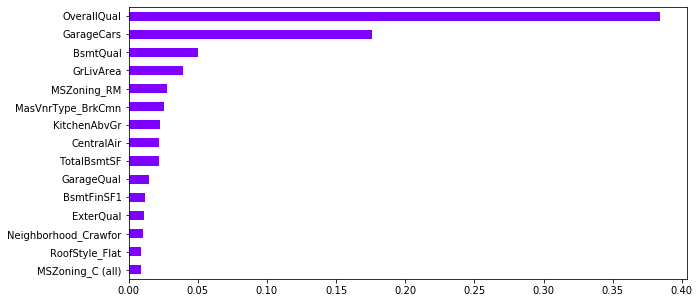

In [22]:
from matplotlib.pyplot import cm
import numpy as np
plt.figure(figsize=(10,5))
importances = pd.Series(XGB.feature_importances_, X_train.columns)
importances.sort_values().tail(15).plot.barh(color = iter(cm.rainbow(np.linspace(-1.1,1.5))));

In [23]:
z=

SyntaxError: invalid syntax (<ipython-input-23-6c36347d6b6b>, line 1)

In [ ]:
params = {
        'n_estimators': [900,1000,1100,1200],
        'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
        'min_child_weight': [0.5, 1, 2],
        'gamma': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
        'subsample': [0.9, 1.0, 1.1,1.2],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8],
        'max_depth': [3, 4, 5]
        }

grid = GridSearchCV(XGB, param_grid=params, n_jobs=4, cv=5, verbose=3 )
grid.fit(X_train,y_train)
#print('\n All results:')
#print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)

In [ ]:
hp_model_f=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=2, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=73,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
hp_model_f.fit(X_train,y_train)
y_pred_hp_model_f=hp_model.predict(X_valid)
print('RMSLE:', root_mean_squared_log_error(y_valid, y_pred_hp_model_f))

In [ ]:
model_xgb.fit(X_train,y_train)
y_pred_model_xgb=model_xgb.predict(X_valid)
print('RMSLE:', root_mean_squared_log_error(y_valid, y_pred_model_xgb))

In [ ]:
df = pd.DataFrame(columns=('w1', 'w2', 'w3', 'mean', 'std'))

i = 0
for w1 in range(1,4):
    for w2 in range(1,4):
        for w3 in range(1,4):

            if len(set((w1,w2,w3))) == 1: # skip if all weights are equal
                continue

            eclf = EnsembleClassifier(clfs=[clf1, clf2, clf3], weights=[w1,w2,w3])
            scores = cross_validation.cross_val_score(
                                            estimator=eclf,
                                            X=X,
                                            y=y,
                                            cv=5,
                                            scoring='accuracy',
                                            n_jobs=1)

            df.loc[i] = [w1, w2, w3, scores.mean(), scores.std()]
            i += 1

df.sort(columns=['mean', 'std'], ascending=False)